### Taller 5

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

df = df.dropna()

In [4]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


Coficicación de las variables cualitativas

In [3]:
df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

Separamos los datos de entrenamiento y prueba

In [4]:
train = df.sample(frac=0.8, random_state=100)
test = df.drop(train.index)
print(train.shape)
print(test.shape)

(314, 10)
(78, 10)


Etiquetas

In [5]:
train_X = train[["MPG","Cylinders","Displacement","Horsepower","Weight"]].copy()
test_X = test[["MPG","Cylinders","Displacement","Horsepower","Weight"]].copy()
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [6]:
train_X.columns

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight'], dtype='object')

In [7]:
import setuptools.dist # necesario en versión 3.12 de python
import tensorflow as tf

In [8]:
norm = tf.keras.layers.Normalization()

In [9]:
norm.adapt(np.array(train_X))

In [10]:
norm

<Normalization name=normalization, built=True>

### Creación del modelo

In [11]:
dnn_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [12]:
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [13]:
%%time
history = dnn_model.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 20.6046 - val_loss: 8.3252
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.6929 - val_loss: 5.0022
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.9424 - val_loss: 4.5623
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.5625 - val_loss: 2.9169
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3.2611 - val_loss: 3.0066
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3.2760 - val_loss: 3.1954
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.0516 - val_loss: 3.2864
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.2123 - val_loss: 3.4600
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 3.3455 - val_loss: 2.9807
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.2582 - val_loss: 2.7432
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.9367 - val_loss: 3.0150
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.0154 - val_l

In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['model'] = 'Model_0'

In [15]:
hist.head()

,loss,val_loss,epoch,model
0,17.535717,8.325234,0,Model_0
1,7.471129,5.002195,1,Model_0
2,4.502174,4.562321,2,Model_0
3,3.257957,2.916859,3,Model_0
4,3.088035,3.006579,4,Model_0


In [16]:
import matplotlib.pyplot as plt

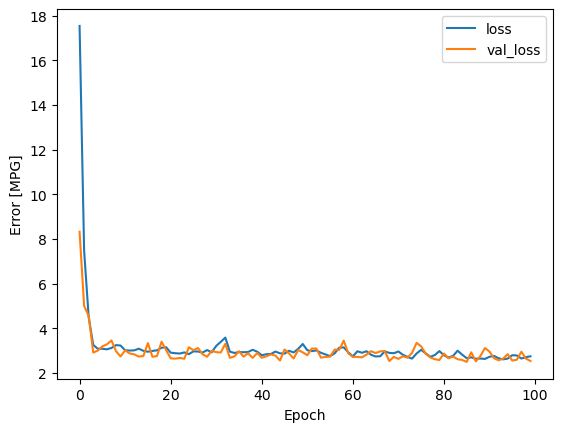

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

## Punto 4 
Creación de 3 casos diferentes al modelo base cambiando las capas

Modelo 1

In [28]:
model4_1 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(1)
  ])


In [29]:
model4_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [30]:
%%time
history41 = model4_1.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 21.2134 - val_loss: 7.9086
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.5109 - val_loss: 5.7598
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.4588 - val_loss: 3.2965
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.9166 - val_loss: 3.2960
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.1936 - val_loss: 3.2508
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.4524 - val_loss: 3.0255
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.0036 - val_loss: 2.7568
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.1742 - val_loss: 2.8229
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3.3075 - val_loss: 2.6835
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.8983 - val_loss: 2.6810
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0543 - val_loss: 2.8632
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.1088 - val_l

In [31]:
hist1 = pd.DataFrame(history41.history)
hist1['epoch'] = history41.epoch
hist1['model'] = 'Model_1'

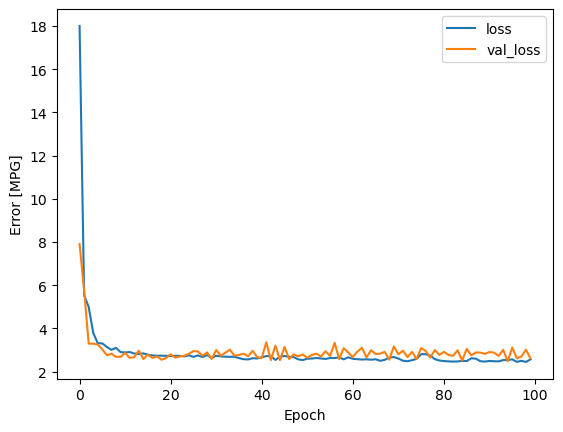

In [32]:
plt.plot(history41.history['loss'], label='loss')
plt.plot(history41.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

Modelo 2

In [38]:
model4_2 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(32, activation='gelu'),
      tf.keras.layers.Dense(1)
  ])

In [39]:
model4_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [40]:
%%time
history42 = model4_2.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 20.7934 - val_loss: 6.3345
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.6960 - val_loss: 4.0532
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9221 - val_loss: 2.9392
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3884 - val_loss: 3.1695
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3277 - val_loss: 3.8215
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3297 - val_loss: 2.7506
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7766 - val_loss: 2.9605
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.1196 - val_loss: 2.6802
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.3943 - val_loss: 2.8092
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1398 - val_loss: 2.8517
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.1738 - val_loss: 2.7092
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.8403 - val_loss: 2.

In [41]:
hist2 = pd.DataFrame(history42.history)
hist2['epoch'] = history42.epoch
hist2['model'] = 'Model_2'

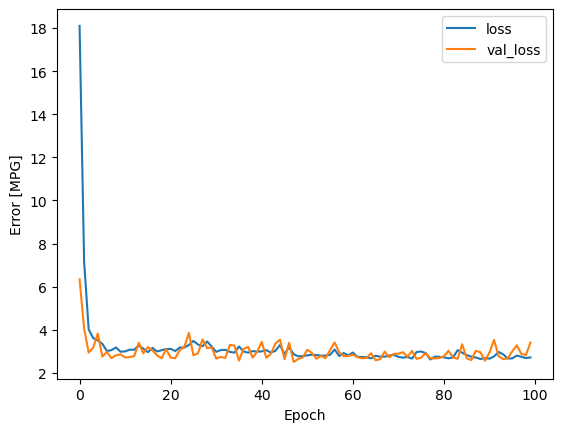

In [42]:
plt.plot(history42.history['loss'], label='loss')
plt.plot(history42.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

Modelo 3

In [43]:
model4_3 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(32, activation='swish'),
      tf.keras.layers.Dense(1)
  ])

In [44]:
model4_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [45]:
%%time
history43 = model4_3.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 21.0641 - val_loss: 8.9604
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.6432 - val_loss: 7.3342
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.9241 - val_loss: 4.0894
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.8742 - val_loss: 3.7454
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.2817 - val_loss: 3.1661
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.6328 - val_loss: 3.1326
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.3173 - val_loss: 2.8228
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.2628 - val_loss: 3.1206
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.9739 - val_loss: 3.0674
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0846 - val_loss: 2.9305
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.2816 - val_loss: 2.6986
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.0100 - val_lo

In [46]:
hist3 = pd.DataFrame(history43.history)
hist3['epoch'] = history43.epoch
hist3['model'] = 'Model_3'

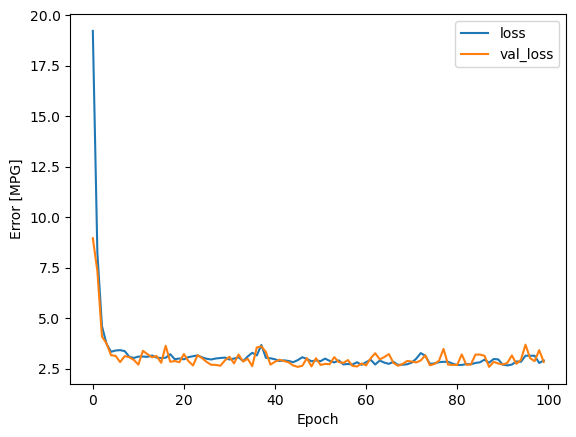

In [47]:
plt.plot(history43.history['loss'], label='loss')
plt.plot(history43.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [48]:
hist_t = pd.concat([hist,hist1,hist2,hist3], ignore_index=True)

In [49]:
import seaborn as sns


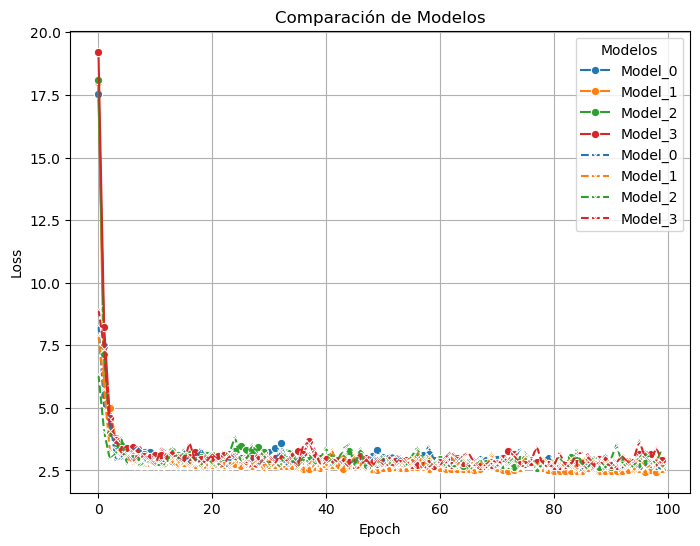

In [50]:

plt.figure(figsize=(8,6))

sns.lineplot(data=hist_t, x='epoch', y='loss', hue='model', linestyle='solid', marker='o')
sns.lineplot(data=hist_t, x='epoch', y='val_loss', hue='model', linestyle='dashed', marker='x')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparación de Modelos')
plt.legend(title="Modelos")
plt.grid(True)
plt.show()

Las diferencias entre los modelos fueron mínimas, por lo que no se puede observar en la escala normal. Para esto, se graficó la diferencia entre cada modelo modificado con el original, generando los siguientes resultados.

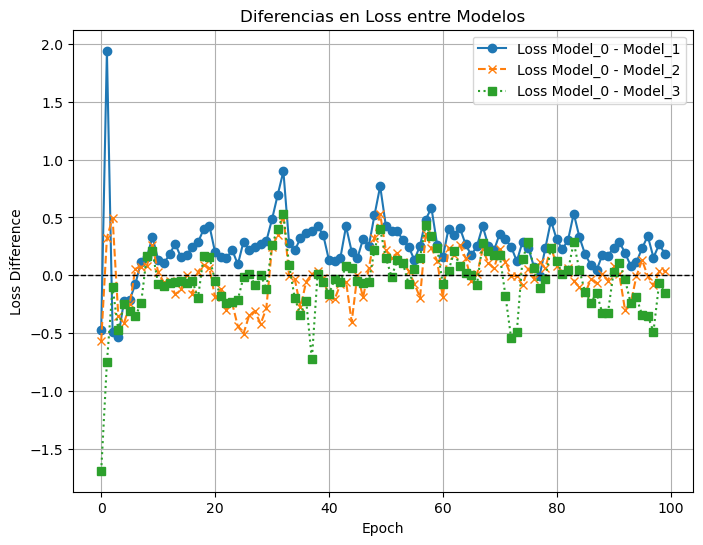

In [51]:



#Calcular las diferencias entre modelos
diff01 = hist['loss'] - hist1['loss']
diff02 = hist['loss'] - hist2['loss']
diff03 = hist['loss'] - hist3['loss']

#Graficar las diferencias
plt.figure(figsize=(8,6))
plt.plot(hist['epoch'], diff01, label='Loss Model_0 - Model_1', linestyle='solid', marker='o')
plt.plot(hist['epoch'], diff02, label='Loss Model_0 - Model_2', linestyle='dashed', marker='x')
plt.plot(hist['epoch'], diff03, label='Loss Model_0 - Model_3', linestyle='dotted', marker='s')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Loss Difference')
plt.title('Diferencias en Loss entre Modelos')
plt.legend()
plt.grid(True)
plt.show()
